#  Monitoring extreme events on lakes with satellite data to optimize dam operations and disaster preparedness

###  Satellite (observations)- extemes - risk assessment-flood forecasting - Production date: 01-07-2024

# Is it possible to identify extreme events observed in the literature that have affected Lake Victoria in the past decade using satellite data?

"Lake water levels from 1992 to present derived from satellite observations" dataset provide point measures water level data for a series of lakes in the whole globe. This dataset can be useful for different applications as water monitoring. Satellite radar altimetry can be a source of water level data that can be used to monitor the state of the lake, useful for example for hydroelectrical plants. In this case study, we extract the water level measure for Victoria Lake and we checked if satellite data are able to detect extreme events and water level trend known in literature. From the results, we can see that satellite data are able to represent the two extreme events (high water in 1998 and low value in 2006) as also the decreasing trend of the water level as reported by Bosuben et. all (2022), ORCID: https://doi.org/10.1080/02508060.2022.2128299. The satellite data has a huge potentiality to be used for water level monitoring.


- Satellite water level data are concordant with the trend of observations
- It is possible to detect the two extreme events (peaks in 1998 and the 2006 drought) with satellite data

The CNES/LEGOS (Laboratoire d’Etudes en Géophysique et Océanographie Spatiales) laboratory developed the HydroWeb website3  and products in the early 2000’s. The objective was to provide worldwide users with space-derived water level time series. Moreover, the lakes_cci project contributes to the improvement of the Lake Water Level (LWL9 estimates and fills the gaps by including data from past and current missions (such as Envisat or Cryosat-2).
In the case of the water level series for Lake Victoria, it exhibits full data completeness with no missing values, linked also to artificial gap filling. By extracting the 0.99 and 0.01 quantiles from the series, we can pinpoint two exceptional events: an extreme high water level in 1998 and an extraordinarily low water level in 2006. These two exceptional occurrences align with findings in the literature, as reported by Bosuben et al. in their 2022 publication (ORCID: https://doi.org/10.1080/02508060.2022.2128299) concerning Lake Victoria. A comparison of the data series extracted in this study with Figure 1 from the paper reveals that satellite data effectively captures the diminishing fluctuations in water level from 2000 to 2006. In summary, based on our findings, it is evident that satellite data can successfully identify the two extreme events (the peaks in 1998 and the 2006 drought) in addition to capturing the documented decreasing trend among the two events. This suggests the potential utility of satellite data in the detection of extremes occurring in water level data.

## Methodology

- Download water level data for Victoria Lake
- Plotting the time series
- Check for completeness of data
- Extraction of 0.01 and 0.99 quantiles
- Detection of extreme events as exceedances of quantile values

## Analysis and results

## Import packages

In [19]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from c3s_eqc_automatic_quality_control import download

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-notebook")

## Set the data request

Set the request for the specific lake (Victoria in our case) analyzed and the collection id (satellite lake water level).

In [20]:
collection_id = "satellite-lake-water-level"
request = {
    "variable": "all",
    "region": "southern_africa",
    "lake": "victoria",
    "version": "version_4_0",
    "format": "zip",
}
varname = "water_surface_height_above_reference_datum"

## Download data and compute quantiles

Extraction of 0.01 and 0.99 quantile

In [21]:
da = download.download_and_transform(collection_id, request)[varname].compute()
da_qiles = da.quantile([0.01, 0.99])

100%|██████████| 1/1 [00:00<00:00, 10.50it/s]


## Plot time series

Plot of time series with a line for each quantile. In this way extreme events can be identified.

Text(0.5, 1.0, 'Lake Victoria water level')

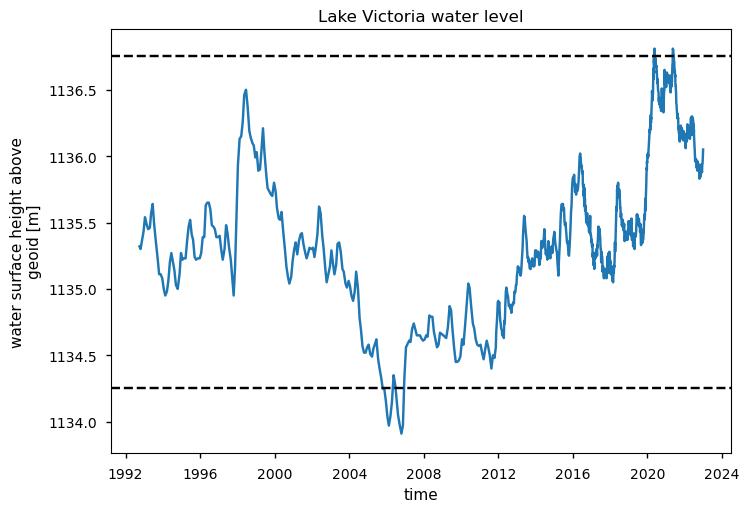

In [22]:
da.plot()
for qile in da_qiles:
    plt.axhline(qile, color="k", ls="--")
plt.title(f"Lake {request['lake'].title()} water level")

## Percentage of missing values

Count the percentage of missing values in the length of data serie. 

In [23]:
num_missing = np.count_nonzero(np.isnan(da))/da.size*100
print(f"Number of missing values: {round(num_missing,2)} %.")

Number of missing values: 0.0 %.


## Show extremes

Show the day and years for which a threshold exceedence happens. 

In [24]:
name = f"{da.attrs['long_name'].title()} [{da.attrs['units']}]"
df99 = da.where(da > da_qiles.sel(quantile=0.99), drop=True).to_dataframe(name)
df01 = da.where(da < da_qiles.sel(quantile=0.01), drop=True).to_dataframe(name)
df99, df01

(                               quantile  Water Surface Height Above Geoid [m]
 time                                                                         
 2020-05-07 19:46:00.002517760      0.99                               1136.76
 2020-05-17 07:50:00.000572160      0.99                               1136.81
 2020-05-17 22:35:59.999656704      0.99                               1136.78
 2020-05-21 07:45:59.999942656      0.99                               1136.77
 2020-05-27 20:33:59.999771136      0.99                               1136.76
 2021-05-11 07:43:00.000114432      0.99                               1136.81
 2021-05-16 19:48:59.999771136      0.99                               1136.80
 2021-05-19 19:40:59.998512384      0.99                               1136.80
 2021-05-20 19:46:00.002517760      0.99                               1136.78
 2021-05-29 17:39:59.999427840      0.99                               1136.76
 2021-05-30 07:50:00.000572160      0.99            

## Comparison with literature data

In the following plot, the water level evolution from 1998 to 2011, as reported by Bosuben et al. (2022), ORCID: https://doi.org/10.1080/02508060.2022, is shown. As can be seen, the satellite data effectively reproduce the two extremes (1996 and 2006) as well as the observed decreasing trend.

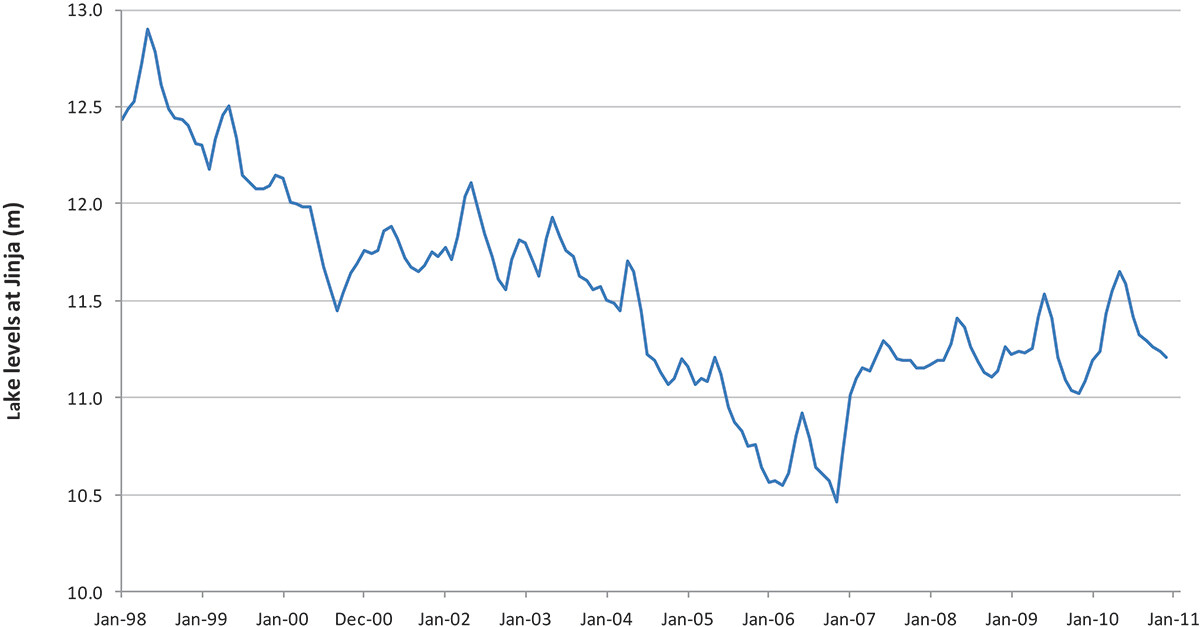